<a href="https://colab.research.google.com/github/Fortirer/Bioinformatic_Python_Intro/blob/main/PreProcessamento_Correlacao_Pvalue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elaborado por Janaina da Silva fortirer
Dúvidas: janainawx@gmail.com

Fonte:

Esta análise foi realizada utilizando os materiais base: https://github.com/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/Pré_Processamento_de_dados.ipynb

https://github.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Comandos%20em%20Python/9%20An%C3%A1lisedeCorrela%C3%A7%C3%A3oCanonica.ipynb




Parte I: análise exploratória

para verificar a distribuição dos dados, relações e possíveis padrões. visualizar como as variáveis estão relacionadas.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

plt.rcParams['figure.dpi'] = 140

In [11]:
df = pd.read_csv('/content/Corr_acai_elev.csv', sep=";")
df.head()

,A_L1,Gs_L1,Heigh_L1,Heigh_L2,Area_L1,Root_Lengh_,TCR,Biom_Tot,Biom_L,Biom_E,...,Suc_E,Raf_E,Myo_E,Sta_E,Glu_R,Fru_R,Suc_R,Raf_R,Myo_R,Sta_R
0,NaN,NaN,NaN,NaN,NaN,26.48,NaN,0.79282,0.19,0.23,...,6.042756,0.081698,2.173511,21.5360,1.765039,1.452895,10.157310,0.118129,0.439084,2.3680
1,4.85,0.013,29.06,NaN,58.74,29.62,0.01,1.00820,0.29,0.31,...,9.113869,0.129787,1.892703,29.8432,1.495013,1.355820,10.038801,0.176232,0.360210,2.4832
2,6.63,0.032,31.57,10.81,59.99,30.10,0.03,1.42878,0.47,0.39,...,8.545883,0.052703,1.570920,32.7744,2.267418,1.629055,8.683906,0.068398,0.196393,1.1840
3,6.30,0.040,32.21,18.03,60.20,37.70,0.01,1.54869,0.46,0.37,...,11.512315,0.124867,1.821885,39.9600,2.356750,2.219133,5.839713,0.025712,0.199824,0.8320
4,7.36,0.040,32.26,34.10,59.73,38.60,0.04,2.17516,0.57,0.72,...,14.852732,0.264311,1.909793,37.8240,2.169626,1.817641,10.465246,0.054226,0.270961,2.2752


In [4]:
df.shape

(36, 30)

In [5]:
df.describe()

,A_L1,Gs_L1,Heigh_L1,Heigh_L2,Area_L1,Root_Lengh_,TCR,Biom_Tot,Biom_L,Biom_E,...,Suc_E,Raf_E,Myo_E,Sta_E,Glu_R,Fru_R,Suc_R,Raf_R,Myo_R,Sta_R
count,10.000000,10.000000,10.000000,8.000000,12.000000,14.000000,12.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,5.300000,0.039000,31.773000,24.288750,62.184167,34.020714,0.018333,1.624198,0.430714,0.527857,...,10.090843,0.134853,1.932936,29.693600,2.079895,1.934935,8.273702,0.072029,0.277275,1.905829
std,1.132117,0.019253,1.505538,11.676673,2.736220,5.002317,0.015859,0.704028,0.156867,0.284177,...,2.930773,0.076821,0.286633,9.082228,0.472661,0.557272,1.607978,0.048916,0.090056,0.689207
min,3.870000,0.013000,29.060000,10.050000,58.740000,26.480000,-0.010000,0.792820,0.190000,0.230000,...,6.042756,0.052703,1.345755,14.867200,1.495013,1.355820,5.839713,0.025335,0.196393,0.832000
25%,4.737500,0.023000,31.687500,14.852500,59.925000,29.740000,0.010000,1.043680,0.302500,0.312500,...,7.949479,0.081043,1.825750,22.147200,1.765039,1.501976,7.016433,0.034207,0.202811,1.322400
50%,4.985000,0.040000,32.235000,24.605000,62.695000,34.770000,0.015000,1.488735,0.465000,0.415000,...,9.449220,0.127327,1.949114,27.830400,1.906078,1.771229,8.211865,0.056597,0.244646,2.110400
75%,6.055000,0.053500,32.800000,34.795000,63.280000,38.075000,0.022500,2.080268,0.510000,0.720000,...,12.425091,0.145586,2.152449,37.616000,2.334417,2.192153,9.899845,0.105696,0.337897,2.368000
max,7.360000,0.070000,33.090000,37.060000,68.300000,41.900000,0.050000,2.938133,0.670000,1.070000,...,14.852732,0.300039,2.385452,45.216000,3.027324,3.150462,10.465246,0.176232,0.439084,2.979200


In [6]:
df.groupby('Tratament').describe().transpose()

Tratament         Amb      Elev
A_L1  count  5.000000  5.000000
      mean   4.632000  5.968000
      std    0.657472  1.155842
      min    3.870000  4.700000
      25%    4.000000  4.850000
...               ...       ...
Sta_R min    0.972800  0.832000
      25%    1.377600  1.580800
      50%    1.494400  2.243200
      75%    2.558400  2.321600
      max    2.979200  2.483200

[232 rows x 2 columns]

In [7]:
df.head()

,Tratament,A_L1,Gs_L1,Heigh_L1,Heigh_L2,Area_L1,Root_Lengh_,TCR,Biom_Tot,Biom_L,...,Suc_E,Raf_E,Myo_E,Sta_E,Glu_R,Fru_R,Suc_R,Raf_R,Myo_R,Sta_R
0,Amb,NaN,NaN,NaN,NaN,NaN,26.48,NaN,0.79282,0.19,...,6.042756,0.081698,2.173511,21.5360,1.765039,1.452895,10.157310,0.118129,0.439084,2.3680
1,Amb,3.87,0.017,29.06,NaN,62.59,29.24,0.01,0.92072,0.25,...,7.557117,0.070040,2.084191,14.8672,1.616287,1.474662,8.145404,0.150074,0.385720,1.4944
2,Amb,4.87,0.058,32.50,10.05,63.16,34.74,0.02,1.15012,0.34,...,7.813670,0.061259,1.837346,21.6704,1.630370,1.851200,6.974582,0.064616,0.230876,1.2672
3,Amb,5.10,0.070,32.90,16.20,64.64,32.13,0.01,1.35788,0.44,...,12.729350,0.140253,2.154201,36.9920,1.985734,2.111216,5.858522,0.044066,0.203541,0.9728
4,Amb,5.32,0.060,33.04,31.18,62.80,37.40,0.02,1.69540,0.51,...,14.397656,0.300039,2.147192,25.8176,1.810520,1.724817,9.482978,0.058968,0.227166,1.4880


In [8]:
df.isna().sum()

Tratament      22
A_L1           26
Gs_L1          26
Heigh_L1       26
Heigh_L2       28
Area_L1        24
Root_Lengh_    22
TCR            24
Biom_Tot       22
Biom_L         22
Biom_E         22
Biom_R         22
Glu_L1         22
Fru_L1         22
Suc_L1         22
Raf_L1         22
Myo_L1         22
Sta_L1         22
Glu_E          22
Fru_E          22
Suc_E          22
Raf_E          22
Myo_E          22
Sta_E          22
Glu_R          22
Fru_R          22
Suc_R          22
Raf_R          22
Myo_R          22
Sta_R          22
dtype: int64

In [ ]:
sns.pairplot(df,hue='Tratament', height=2)

In [9]:
df.head(10)

,Tratament,A_L1,Gs_L1,Heigh_L1,Heigh_L2,Area_L1,Root_Lengh_,TCR,Biom_Tot,Biom_L,...,Suc_E,Raf_E,Myo_E,Sta_E,Glu_R,Fru_R,Suc_R,Raf_R,Myo_R,Sta_R
0,Amb,NaN,NaN,NaN,NaN,NaN,26.48,NaN,0.792820,0.19,...,6.042756,0.081698,2.173511,21.5360,1.765039,1.452895,10.157310,0.118129,0.439084,2.3680
1,Amb,3.87,0.017,29.06,NaN,62.59,29.24,0.01,0.920720,0.25,...,7.557117,0.070040,2.084191,14.8672,1.616287,1.474662,8.145404,0.150074,0.385720,1.4944
2,Amb,4.87,0.058,32.50,10.05,63.16,34.74,0.02,1.150120,0.34,...,7.813670,0.061259,1.837346,21.6704,1.630370,1.851200,6.974582,0.064616,0.230876,1.2672
3,Amb,5.10,0.070,32.90,16.20,64.64,32.13,0.01,1.357880,0.44,...,12.729350,0.140253,2.154201,36.9920,1.985734,2.111216,5.858522,0.044066,0.203541,0.9728
4,Amb,5.32,0.060,33.04,31.18,62.80,37.40,0.02,1.695400,0.51,...,14.397656,0.300039,2.147192,25.8176,1.810520,1.724817,9.482978,0.058968,0.227166,1.4880
5,Amb,NaN,NaN,NaN,NaN,68.30,38.90,0.02,1.999452,0.51,...,8.356905,0.080824,1.576214,23.5776,1.826422,1.583918,6.889028,0.031359,0.201865,2.7488
6,Amb,4.00,0.040,33.09,36.88,63.64,38.20,0.01,2.107207,0.49,...,13.040508,0.220991,2.385452,39.6736,3.027324,3.150462,7.718711,0.042750,0.266147,2.9792
7,Elev,NaN,NaN,NaN,NaN,NaN,26.48,NaN,0.792820,0.19,...,6.042756,0.081698,2.173511,21.5360,1.765039,1.452895,10.157310,0.118129,0.439084,2.3680
8,Elev,4.85,0.013,29.06,NaN,58.74,29.62,0.01,1.008200,0.29,...,9.113869,0.129787,1.892703,29.8432,1.495013,1.355820,10.038801,0.176232,0.360210,2.4832
9,Elev,6.63,0.032,31.57,10.81,59.99,30.10,0.03,1.428780,0.47,...,8.545883,0.052703,1.570920,32.7744,2.267418,1.629055,8.683906,0.068398,0.196393,1.1840


In [13]:
# Análise de Correlação
corr = df.corr()
print(corr)

                 A_L1     Gs_L1  Heigh_L1  Heigh_L2   Area_L1  Root_Lengh_  \
A_L1         1.000000  0.896436  0.541453 -0.337052  0.711811     0.462658   
Gs_L1        0.896436  1.000000  0.771404 -0.356660  0.897983     0.703547   
Heigh_L1     0.541453  0.771404  1.000000  0.628618  0.813796     0.754330   
Heigh_L2    -0.337052 -0.356660  0.628618  1.000000 -0.834542     0.559211   
Area_L1      0.711811  0.897983  0.813796 -0.834542  1.000000     0.739574   
Root_Lengh_  0.462658  0.703547  0.754330  0.559211  0.739574     1.000000   
TCR          0.891640  0.602927  0.147656 -0.300057  0.681593     0.473856   
Biom_Tot    -0.066843  0.107668  0.668153  0.935876  0.589359     0.807994   
Biom_L       0.173991  0.342769  0.836116  0.924697  0.604008     0.834552   
Biom_E      -0.215590 -0.091822  0.498009  0.907564  0.480074     0.706469   
Biom_R       0.021399  0.235111  0.756024  0.959049  0.663867     0.856286   
Glu_L1       0.677675  0.627471  0.339941  0.367362 -0.476082   

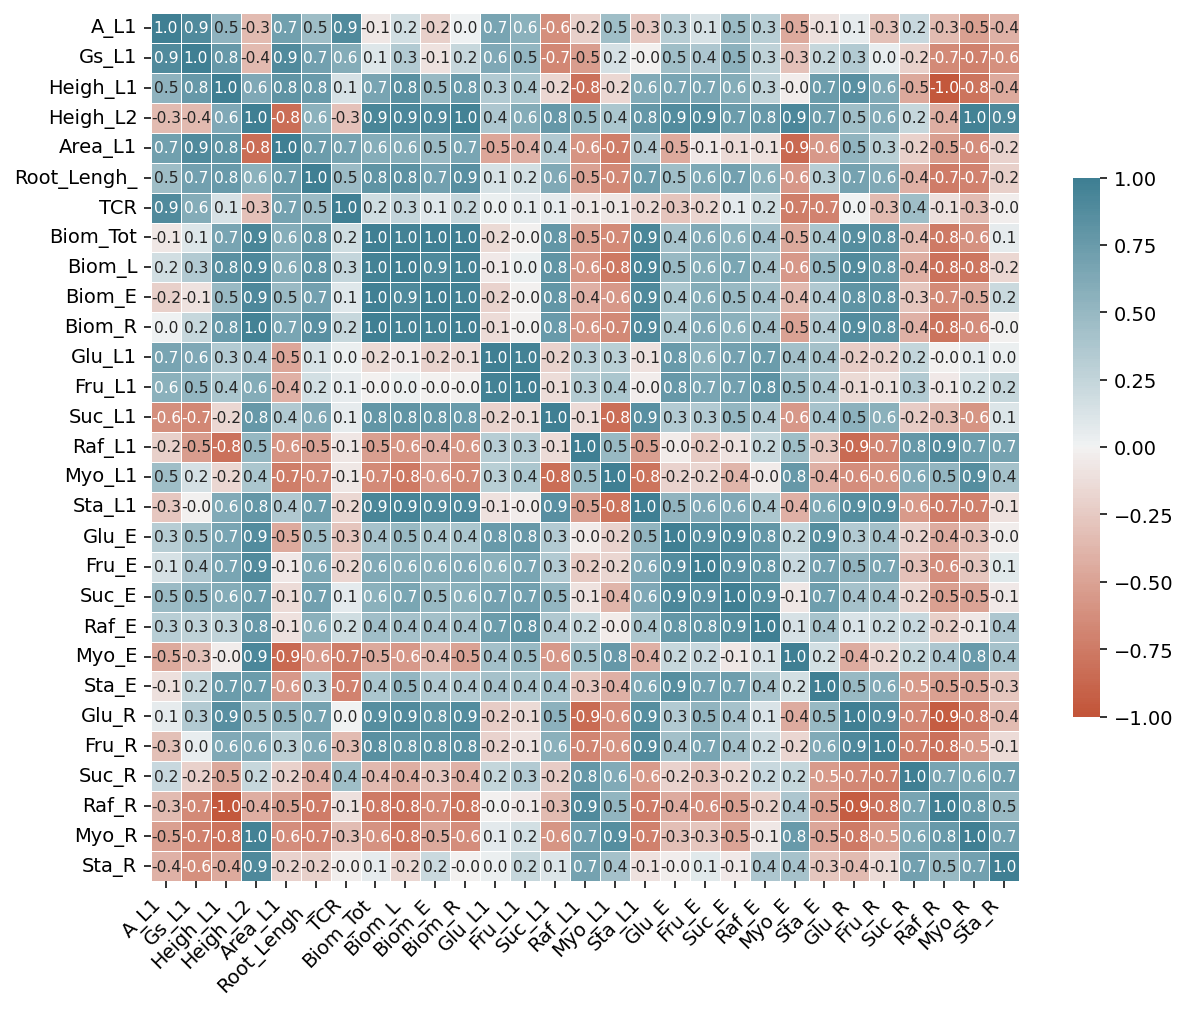

In [15]:

# Configure a figura
plt.figure(figsize=(10, 10))

# Crie o heatmap
sns.heatmap(
    corr,
    annot=True,  # adicionar números no heatmap
    fmt=".1f",   # 1 casa decimal
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 8}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar a figura
plt.show()

Para analise de correlacao é preciso tratar os dados NaN
remover, substituir por zero ou pela édi

In [20]:
df.fillna(0, inplace=True)  # trocando NA por zero
# df.dropna(inplace=True)

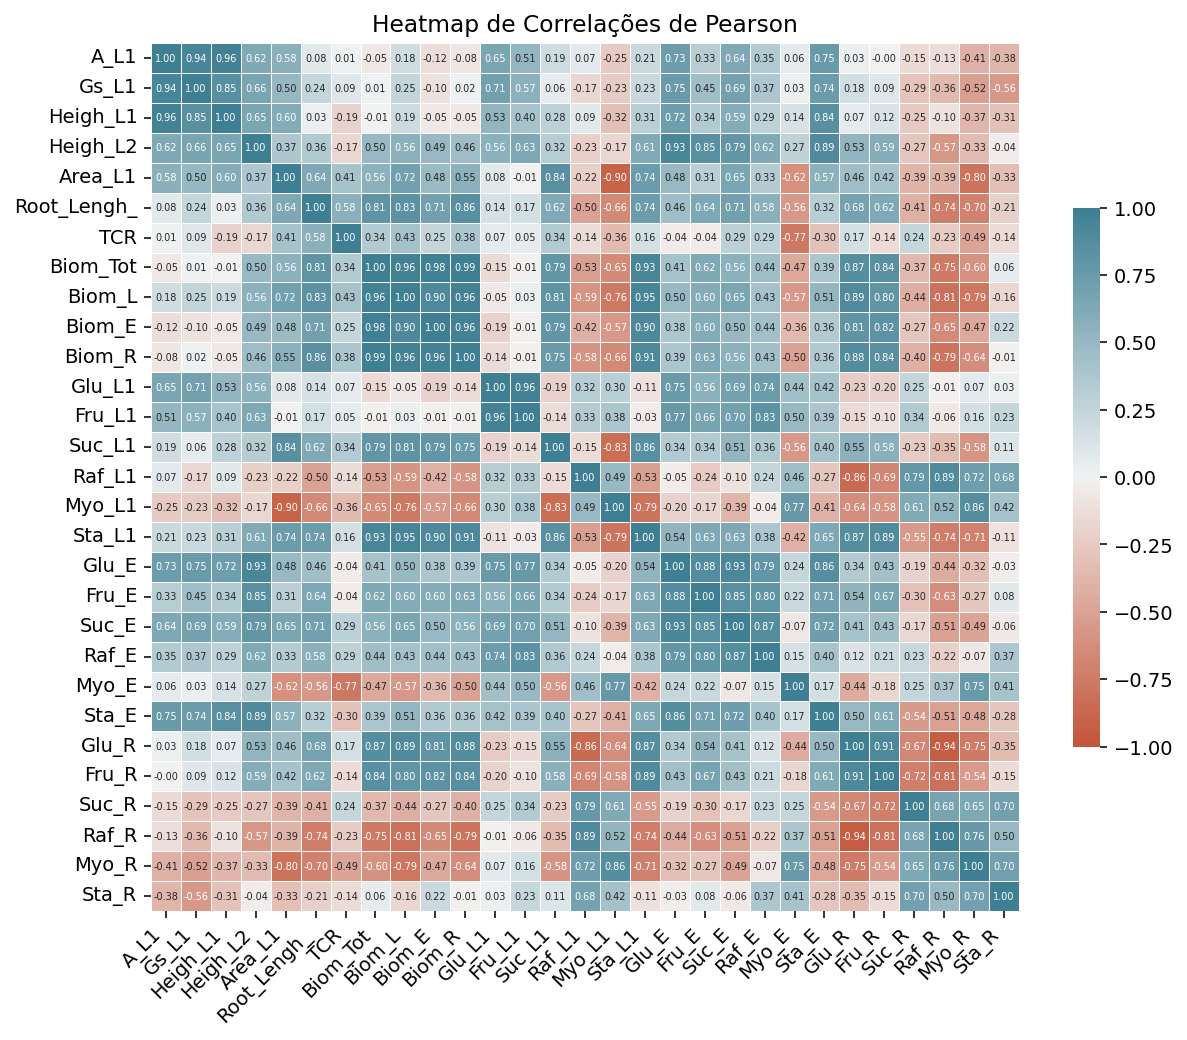

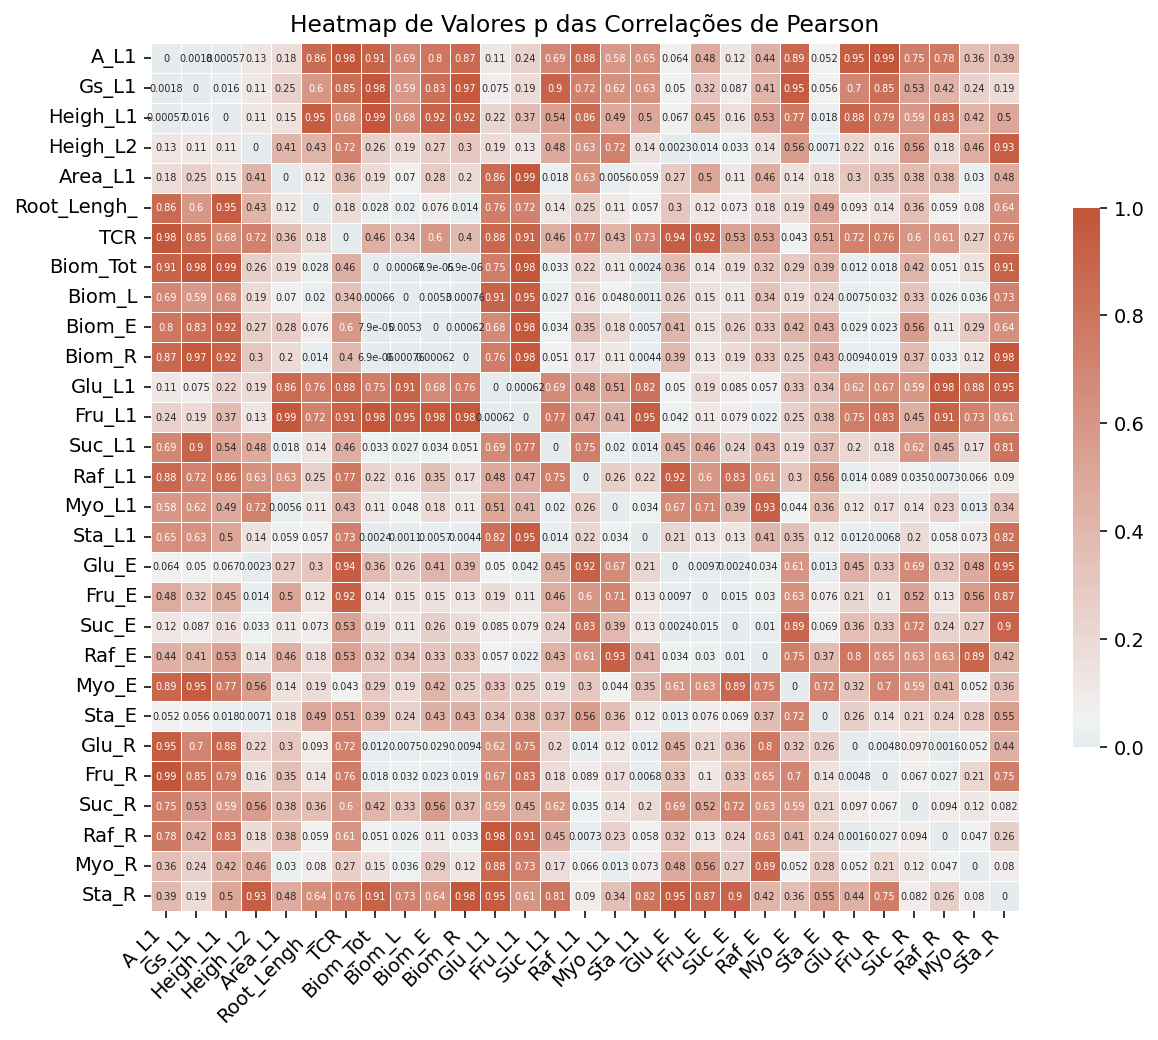

In [24]:
# Inicializar DataFrames para correlações e valores p
corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

# Calcular correlações de Pearson e valores p
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            corr.at[col1, col2] = 1.0
            p_values.at[col1, col2] = 0.0
        else:
            corr_val, p_val = pearsonr(df[col1], df[col2])
            corr.at[col1, col2] = corr_val
            p_values.at[col1, col2] = p_val

# Plotar o heatmap da correlação com anotações de valores p
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,  # adicionar números no heatmap
    fmt=".2f",   # 2 casas decimais
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 5}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.title('Heatmap de Correlações de Pearson')

# Mostrar a figura
plt.show()

# Plotar o heatmap dos valores p com anotações
plt.figure(figsize=(10, 10))
sns.heatmap(
    p_values,
    annot=True,  # adicionar números no heatmap
    fmt=".2g",   # formato científico
    vmin=0, vmax=1, center=0.05,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 5}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.title('Heatmap de Valores p das Correlações de Pearson')

# Mostrar a figura
plt.show()

In [25]:
# Salvar os valores de p em uma planilha CSV
p_values.to_csv('p_valuesTeste.csv', index=True)